# Load packages

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing, cargo and tanker vessels

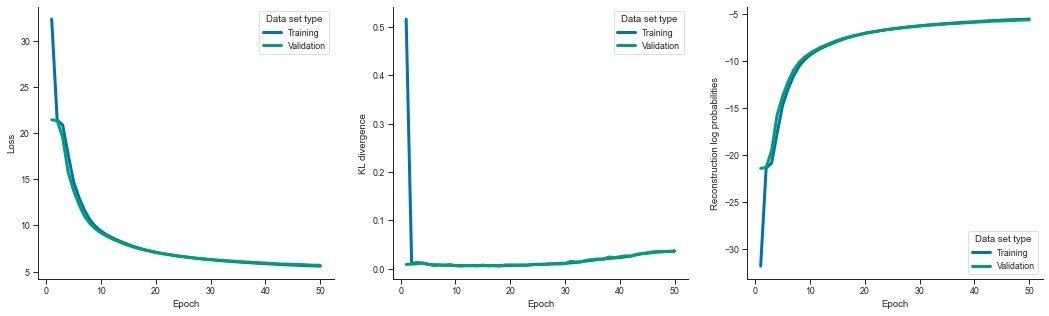

In [2]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)

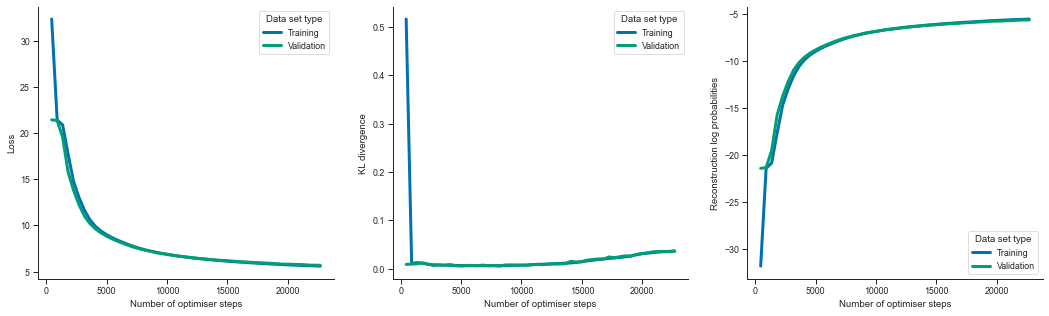

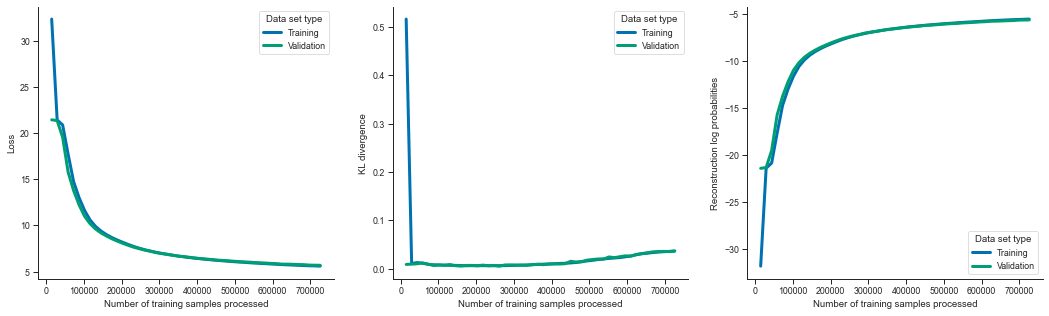

In [3]:
# Plot the same things as above, but with optimizer steps and number of processed training samples on the x-axis
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Step"), x="Number of optimiser steps")
summary_models.plot_curves(summary_models.load_curves_df("Default", level="Sample"), x="Number of training samples processed")

#  Annealed Kullback–Leibler 

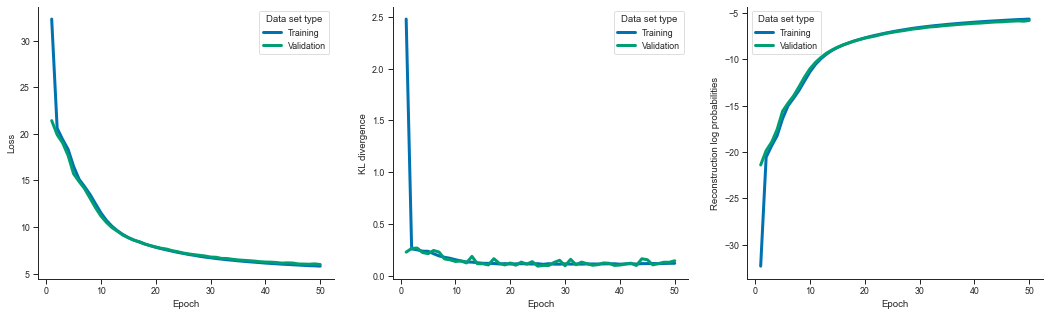

In [4]:
summary_models = SummaryModels(file_name, kl_annealing=True)
df_annealing = summary_models.load_curves_df("Annealing")
summary_models.plot_curves(df_annealing)

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for fishing, cargo and tanker vessels

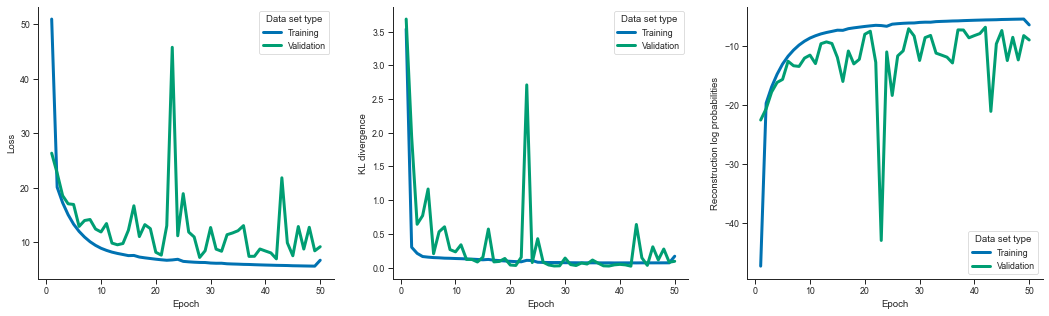

In [5]:
summary_models = SummaryModels(file_name, batch_norm=True)
df_batch_norm = summary_models.load_curves_df("Batch_Norm")
summary_models.plot_curves(df_batch_norm)

#  Batch normalization & Annealed Kullback–Leibler 

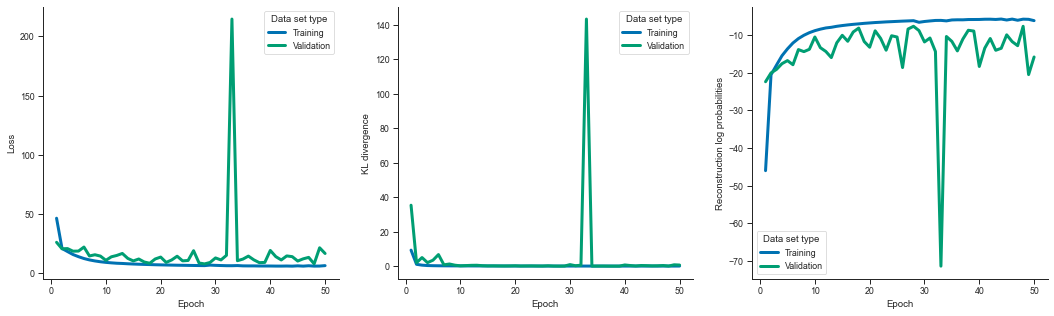

In [6]:
summary_models = SummaryModels(file_name, batch_norm=True, kl_annealing=True)
df_batch_norm_annealing = summary_models.load_curves_df("Batch_Norm_Annealing")
summary_models.plot_curves(df_batch_norm_annealing)

# Compare the different model setups

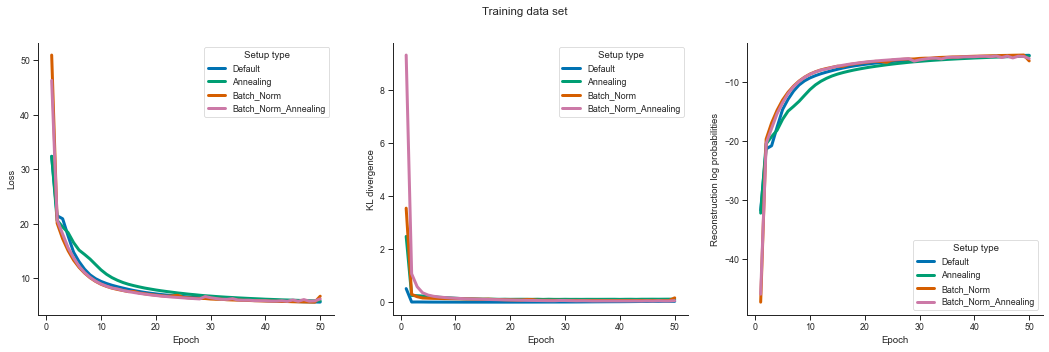

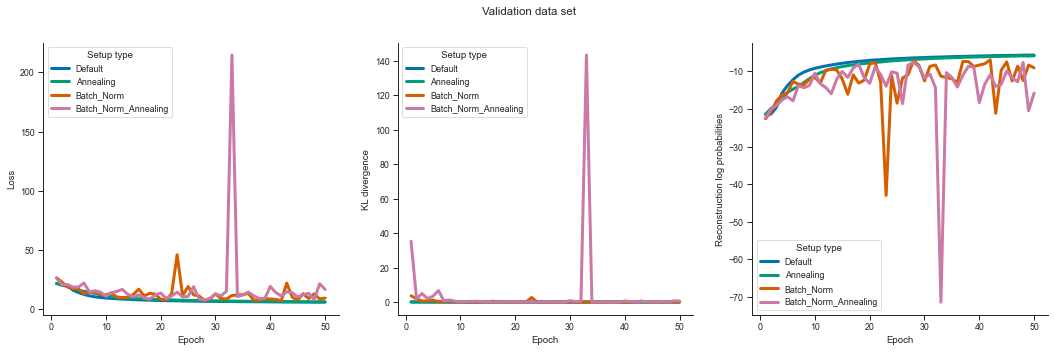

In [7]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities (by ship type)

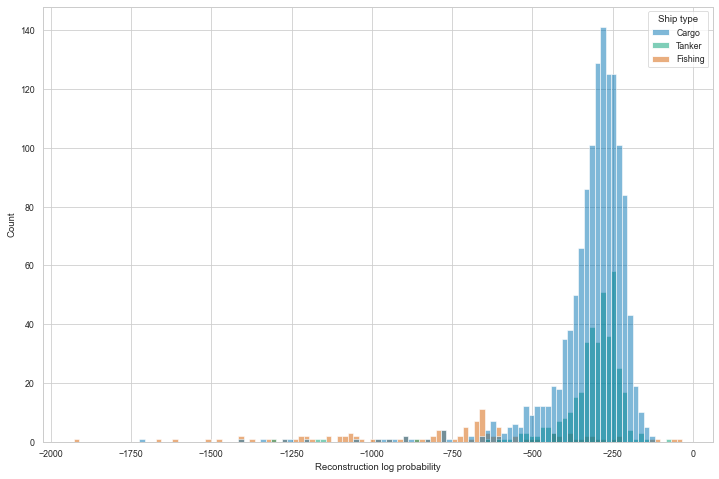

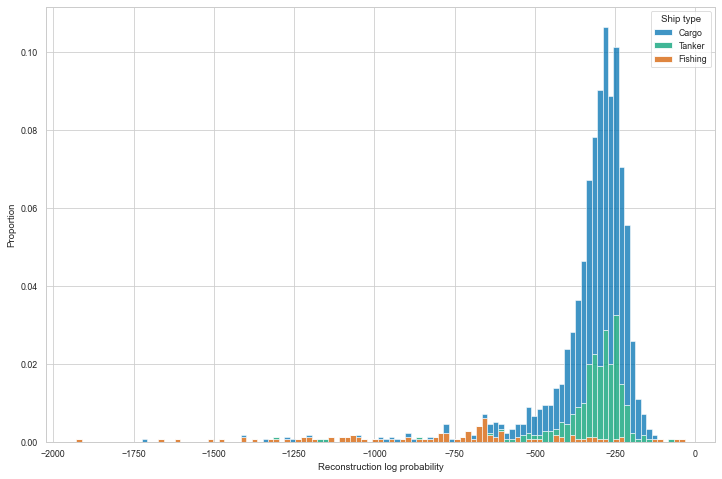

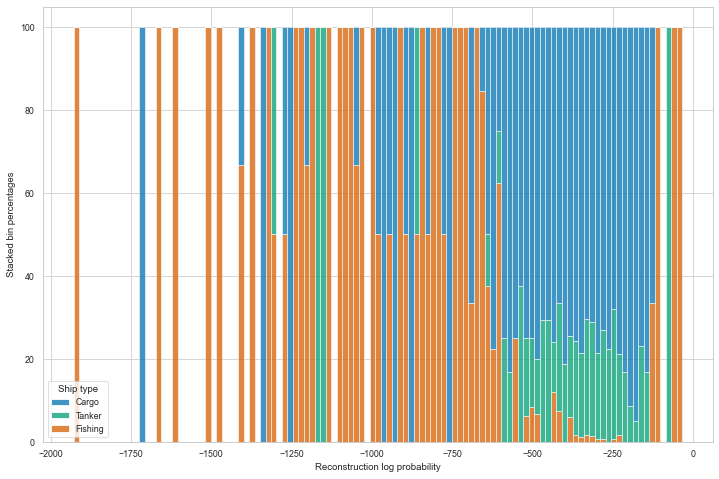

Mean Reconstruction log probability: -342.6190256754557
Median Reconstruction log probability: -293.58758544921875
Reconstruction log probability statistics by ship type: 
            count        mean         std          min          25%  \
Ship type                                                             
Cargo      1310.0 -315.220149  127.182938 -1708.687256  -344.248734   
Fishing     113.0 -768.029910  361.145576 -1928.990356 -1026.835449   
Tanker      392.0 -311.550400  112.604342 -1303.677002  -336.541840   

                  50%         75%         max  
Ship type                                      
Cargo     -289.334442 -247.204887 -132.601990  
Fishing   -692.252930 -599.287720  -33.273582  
Tanker    -289.333725 -252.264931  -70.281319  


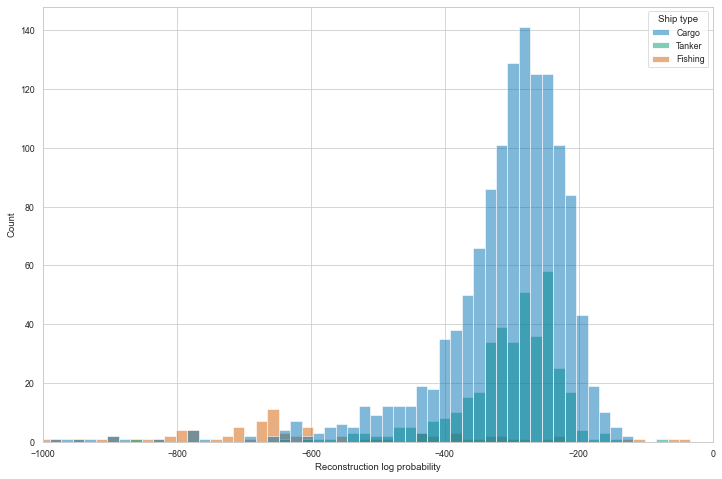

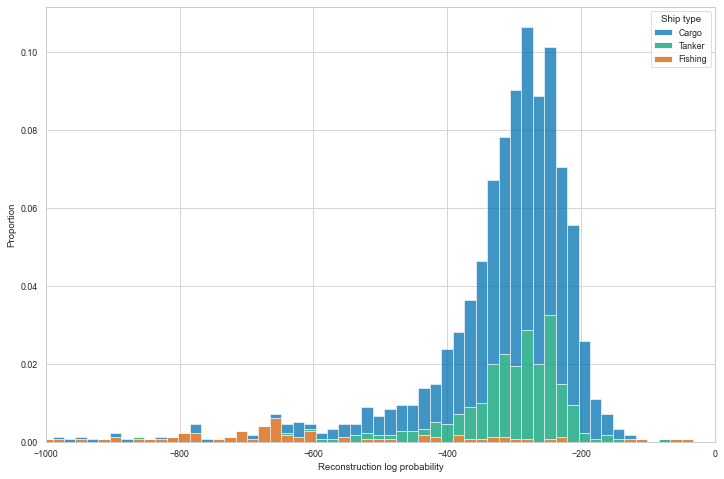

Mean Reconstruction log probability: -342.6190256754557
Median Reconstruction log probability: -293.58758544921875
Reconstruction log probability statistics by ship type: 
            count        mean         std          min          25%  \
Ship type                                                             
Cargo      1310.0 -315.220149  127.182938 -1708.687256  -344.248734   
Fishing     113.0 -768.029910  361.145576 -1928.990356 -1026.835449   
Tanker      392.0 -311.550400  112.604342 -1303.677002  -336.541840   

                  50%         75%         max  
Ship type                                      
Cargo     -289.334442 -247.204887 -132.601990  
Fishing   -692.252930 -599.287720  -33.273582  
Tanker    -289.333725 -252.264931  -70.281319  


In [8]:
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation()["TrajectoryLevelData"]
x = "Reconstruction log probability"
hue = "Ship type"
hue_order = ["Cargo", "Tanker", "Fishing"]

# Plot trajectory based reconstruction log probabilities
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-1000, 0], print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

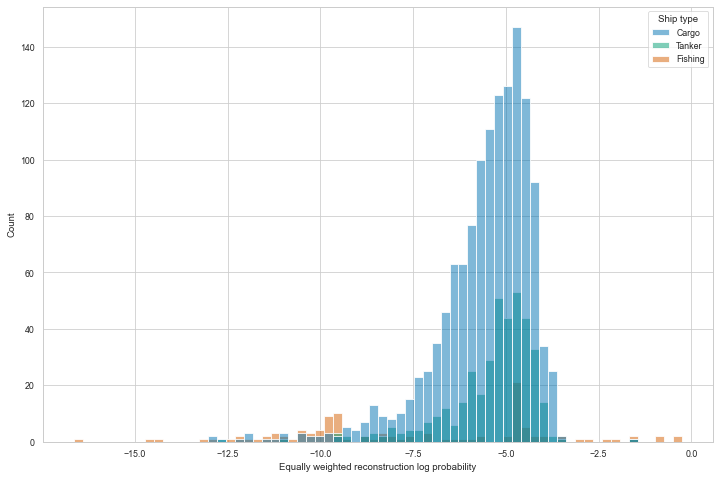

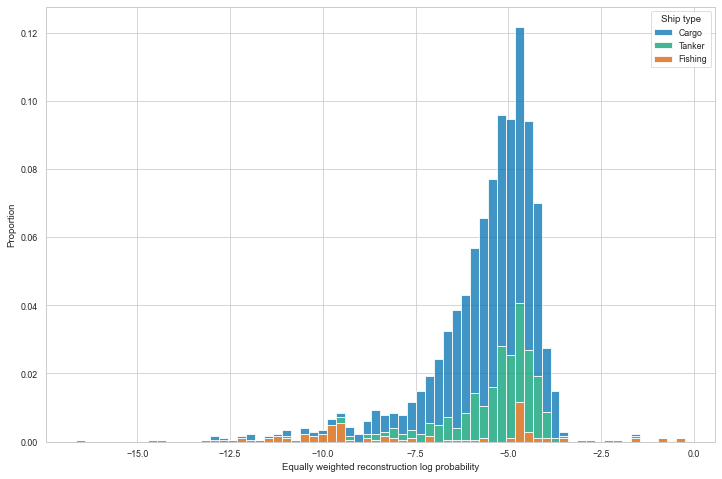

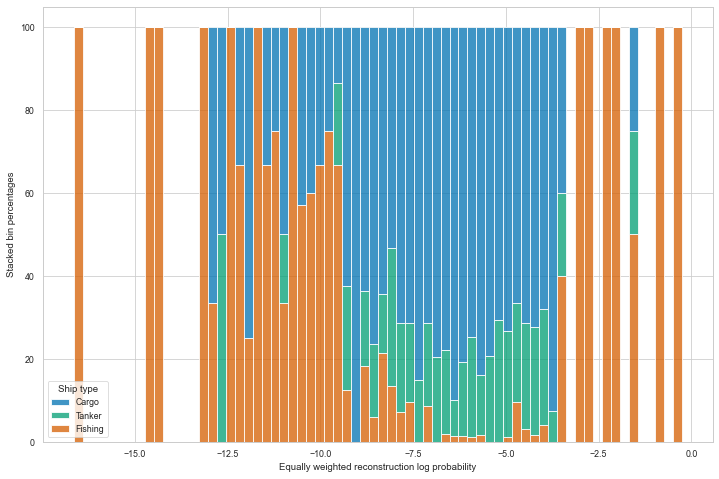

Mean Equally weighted reconstruction log probability: -5.642872149657063
Median Equally weighted reconstruction log probability: -5.235986224675583
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      1310.0 -5.563566  1.311576 -12.847273 -6.123628 -5.288013   
Fishing     113.0 -7.480962  3.424420 -16.652180 -9.914459 -8.011198   
Tanker      392.0 -5.378043  1.210656 -12.657058 -5.825014 -5.096259   

                75%       max  
Ship type                      
Cargo     -4.694256 -1.520364  
Fishing   -4.635086 -0.246471  
Tanker    -4.616271 -1.597303  


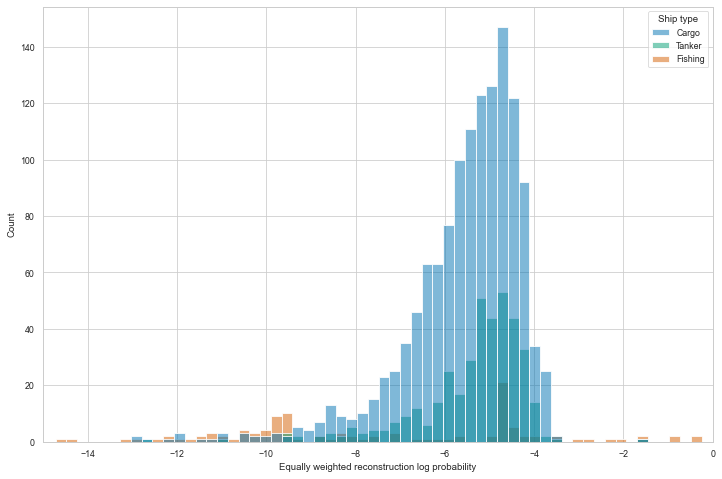

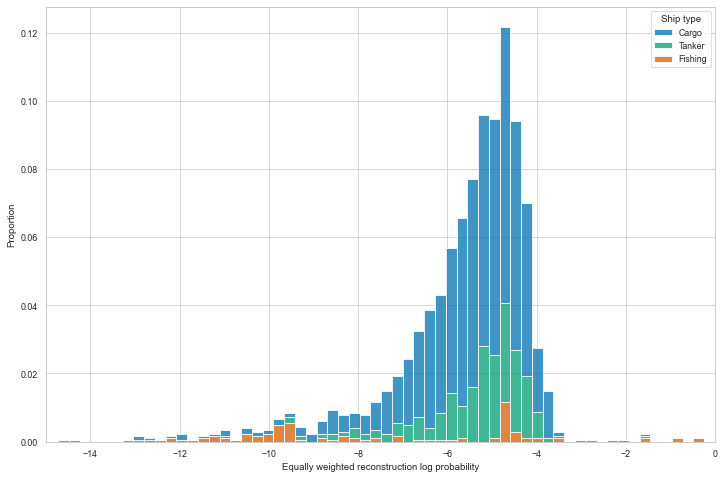

Mean Equally weighted reconstruction log probability: -5.642872149657063
Median Equally weighted reconstruction log probability: -5.235986224675583
Equally weighted reconstruction log probability statistics by ship type: 
            count      mean       std        min       25%       50%  \
Ship type                                                              
Cargo      1310.0 -5.563566  1.311576 -12.847273 -6.123628 -5.288013   
Fishing     113.0 -7.480962  3.424420 -16.652180 -9.914459 -8.011198   
Tanker      392.0 -5.378043  1.210656 -12.657058 -5.825014 -5.096259   

                75%       max  
Ship type                      
Cargo     -4.694256 -1.520364  
Fishing   -4.635086 -0.246471  
Tanker    -4.616271 -1.597303  


In [9]:
x = "Equally weighted reconstruction log probability"
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order,
                                 stat="normalized_each_bin", ylabel="Stacked bin percentages", print_summary_stats=True)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-15, 0], print_summary_stats=True)

In [10]:
# Look at some length statistics
data.groupby("Ship type")["Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Cargo,1310.0,57.541221,17.253010,25.0,45.0,57.0,67.00,142.0
Fishing,113.0,111.699115,34.560993,30.0,86.0,124.0,141.00,144.0
Tanker,392.0,57.818878,11.647216,25.0,52.0,57.0,61.25,135.0
